# Import libraries

In [5]:
import pandas as pd
from config import RAW_DIR, CLEAN_DIR, FIG_DATA_DIR
import numpy as np
import os

In [6]:
files = [
"FL24_1_metaphlan3.txt",
"XS24_2_metaphlan3.txt",
"XS24_3_metaphlan3.txt",
"FS24_3_metaphlan3.txt",
"NS0_3_metaphlan3.txt",
"FS24_2_metaphlan3.txt",
"NS24_1_metaphlan3.txt",
"NS0_2_metaphlan3.txt",
"IN24_2_metaphlan3.txt",
"GS24_2_metaphlan3.txt",
"IN24_3_metaphlan3.txt",
"GS24_3_metaphlan3.txt",
"FL24_3_metaphlan3.txt",
"FL24_2_metaphlan3.txt",
"XS24_1_metaphlan3.txt",
"NS24_3_metaphlan3.txt",
"NS0_1_metaphlan3.txt",
"FS24_1_metaphlan3.txt",
"NS24_2_metaphlan3.txt",
"GS24_1_metaphlan3.txt",
"IN24_1_metaphlan3.txt",
]

In [7]:
files = [os.path.join(RAW_DIR, "prebiotics", f) for f in files]

In [8]:
dataframes = []

for file in files:
    name = file.split("/")[-1].split("_metaphlan3.txt")[0]
    df = pd.read_csv(file, sep="\t", skiprows=3, index_col=0, usecols=["#clade_name", "relative_abundance"])
    df.columns = [name]
    dataframes.append(df)

In [9]:
dataframes

[                                                       FL24_1
 #clade_name                                                  
 UNKNOWN                                             20.581250
 k__Bacteria                                         77.780903
 k__Viruses                                           1.637845
 k__Bacteria|p__Bacteroidetes                        33.118492
 k__Bacteria|p__Actinobacteria                       18.335939
 ...                                                       ...
 k__Bacteria|p__Proteobacteria|c__Gammaproteobac...   0.000516
 k__Bacteria|p__Synergistetes|c__Synergistia|o__...   0.000508
 k__Bacteria|p__Proteobacteria|c__Gammaproteobac...   0.000508
 k__Bacteria|p__Actinobacteria|c__Coriobacteriia...   0.000469
 k__Bacteria|p__Actinobacteria|c__Coriobacteriia...   0.000421
 
 [310 rows x 1 columns],
                                                        XS24_2
 #clade_name                                                  
 UNKNOWN                    

In [10]:
concat_df = pd.concat(dataframes, axis=1).fillna(0).T
concat_df

#clade_name,UNKNOWN,k__Bacteria,k__Viruses,k__Bacteria|p__Bacteroidetes,k__Bacteria|p__Actinobacteria,k__Bacteria|p__Proteobacteria,k__Bacteria|p__Firmicutes,k__Bacteria|p__Fusobacteria,k__Viruses|p__Viruses_unclassified,k__Bacteria|p__Verrucomicrobia,...,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Caudovirales|f__Siphoviridae|g__Sfi21dt1virus|s__Streptococcus_virus_phiAbc2,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Caudovirales|f__Myoviridae|g__Myoviridae_unclassified|s__Cronobacter_phage_ENT47670,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Caudovirales|f__Siphoviridae|g__Siphoviridae_unclassified|s__Lactobacillus_phage_Sha1,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Caudovirales|f__Siphoviridae|g__Sfi21dt1virus|s__Streptococcus_virus_7201,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Caudovirales|f__Siphoviridae|g__Siphoviridae_unclassified|s__Lactobacillus_phage_phig1e,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiaceae|g__Clostridium|s__Clostridium_bolteae_CAG_59,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Caudovirales|f__Siphoviridae|g__Siphoviridae_unclassified|s__Lactococcus_phage_bIL309,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Gardnerella|s__Gardnerella_vaginalis,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Prevotellaceae|g__Prevotella|s__Prevotella_stercorea,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Pseudoflavonifractor|s__Pseudoflavonifractor_sp_An184
FL24_1,20.58125,77.780903,1.637845,33.118492,18.335939,11.576220,8.764335,5.980812,1.637845,0.004598,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
XS24_2,26.89108,72.969542,0.139382,28.337487,7.453535,16.836400,14.762593,5.488185,0.139382,0.089515,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
XS24_3,26.24260,73.640800,0.116596,28.734318,7.034486,16.920721,15.192408,5.679039,0.116596,0.076700,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FS24_3,28.55808,70.556079,0.885844,24.783982,11.577478,11.636432,15.393448,7.149336,0.885844,0.005937,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NS0_3,40.88045,59.067947,0.048171,17.065111,3.506392,0.966995,37.520232,0.001377,0.048171,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FS24_2,28.62950,70.361040,1.009464,24.434770,11.658022,11.989010,15.296476,6.969258,1.009464,0.006523,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NS24_1,18.86002,81.080191,0.059792,25.214444,1.291456,37.470379,10.801590,6.296519,0.059792,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NS0_2,40.73568,59.199504,0.059211,17.300636,3.387620,1.071564,37.432074,0.000000,0.059211,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
IN24_2,26.69536,73.108640,0.196002,36.642278,8.406672,13.192167,9.893392,4.967628,0.196002,0.003255,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GS24_2,15.89142,84.067791,0.040793,32.190054,9.342117,29.027336,9.414568,4.092042,0.040793,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [11]:
import pandas as pd
import numpy as np
import os
from joblib import dump, load
import config

gmhi2 = load(os.path.join(config.MODEL_DIR, "gmhi2_model.joblib"))
gmhi2

LogisticRegression(C=0.03, class_weight='balanced', penalty='l1',
                   random_state=42, solver='liblinear')

In [12]:
concat_df = concat_df.divide((100 - concat_df["UNKNOWN"]), axis="rows")
concat_df = concat_df.drop(labels="UNKNOWN", axis=1)
concat_df[list(set(gmhi2.feature_names_in_) - set(concat_df.columns))] = 0
concat_df = concat_df.copy()[gmhi2.feature_names_in_]

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_50106/2652610923.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  concat_df[list(set(gmhi2.feature_names_in_) - set(concat_df.columns))] = 0
/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_50106/2652610923.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  concat_df[list(set(gmhi2.feature_names_in_) - set(concat_df.columns))] = 0
/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_50106/2652610923.py:3: PerformanceWarning: DataFrame is highly fragme

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_50106/2652610923.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  concat_df[list(set(gmhi2.feature_names_in_) - set(concat_df.columns))] = 0
/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_50106/2652610923.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  concat_df[list(set(gmhi2.feature_names_in_) - set(concat_df.columns))] = 0
/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_50106/2652610923.py:3: PerformanceWarning: DataFrame is highly fragme

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_50106/2652610923.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  concat_df[list(set(gmhi2.feature_names_in_) - set(concat_df.columns))] = 0
/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_50106/2652610923.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  concat_df[list(set(gmhi2.feature_names_in_) - set(concat_df.columns))] = 0
/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_50106/2652610923.py:3: PerformanceWarning: DataFrame is highly fragme

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_50106/2652610923.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  concat_df[list(set(gmhi2.feature_names_in_) - set(concat_df.columns))] = 0
/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_50106/2652610923.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  concat_df[list(set(gmhi2.feature_names_in_) - set(concat_df.columns))] = 0
/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_50106/2652610923.py:3: PerformanceWarning: DataFrame is highly fragme

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_50106/2652610923.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  concat_df[list(set(gmhi2.feature_names_in_) - set(concat_df.columns))] = 0
/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_50106/2652610923.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  concat_df[list(set(gmhi2.feature_names_in_) - set(concat_df.columns))] = 0
/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_50106/2652610923.py:3: PerformanceWarning: DataFrame is highly fragme

In [13]:
concat_df.sum(axis=1)

FL24_1    6.979377
XS24_2    6.998361
XS24_3    6.998570
FS24_3    6.987663
NS0_3     6.999186
FS24_2    6.985968
NS24_1    6.999786
NS0_2     6.999001
IN24_2    6.997327
GS24_2    6.999837
IN24_3    6.993470
GS24_3    6.999998
FL24_3    6.977635
FL24_2    6.979943
XS24_1    6.998710
NS24_3    6.999751
NS0_1     6.998761
FS24_1    6.991555
NS24_2    7.000000
GS24_1    6.999834
IN24_1    6.994398
dtype: float64

In [14]:
output = pd.DataFrame(gmhi2.decision_function(concat_df > config.PRESENCE_CUTOFF), index=concat_df.index, columns=["GMHI2_score"])
# output = pd.DataFrame((concat_df > config.PRESENCE_CUTOFF).sum(axis=1), index=concat_df.index, columns=["GMHI2_score"])
output

,GMHI2_score
FL24_1,-0.606819
XS24_2,0.303276
XS24_3,0.100174
FS24_3,0.349678
NS0_3,0.037727
FS24_2,0.349678
NS24_1,-0.177438
NS0_2,-0.219505
IN24_2,0.556352
GS24_2,0.607876


In [15]:
groups = ["NS0", "NS24", "FS24", "IN24", "GS24", "XS24", "FL24"]

In [16]:
group_values = {g : [float(output.loc[f"{g}_{i}"]) for i in range(1, 4)] for g in groups}

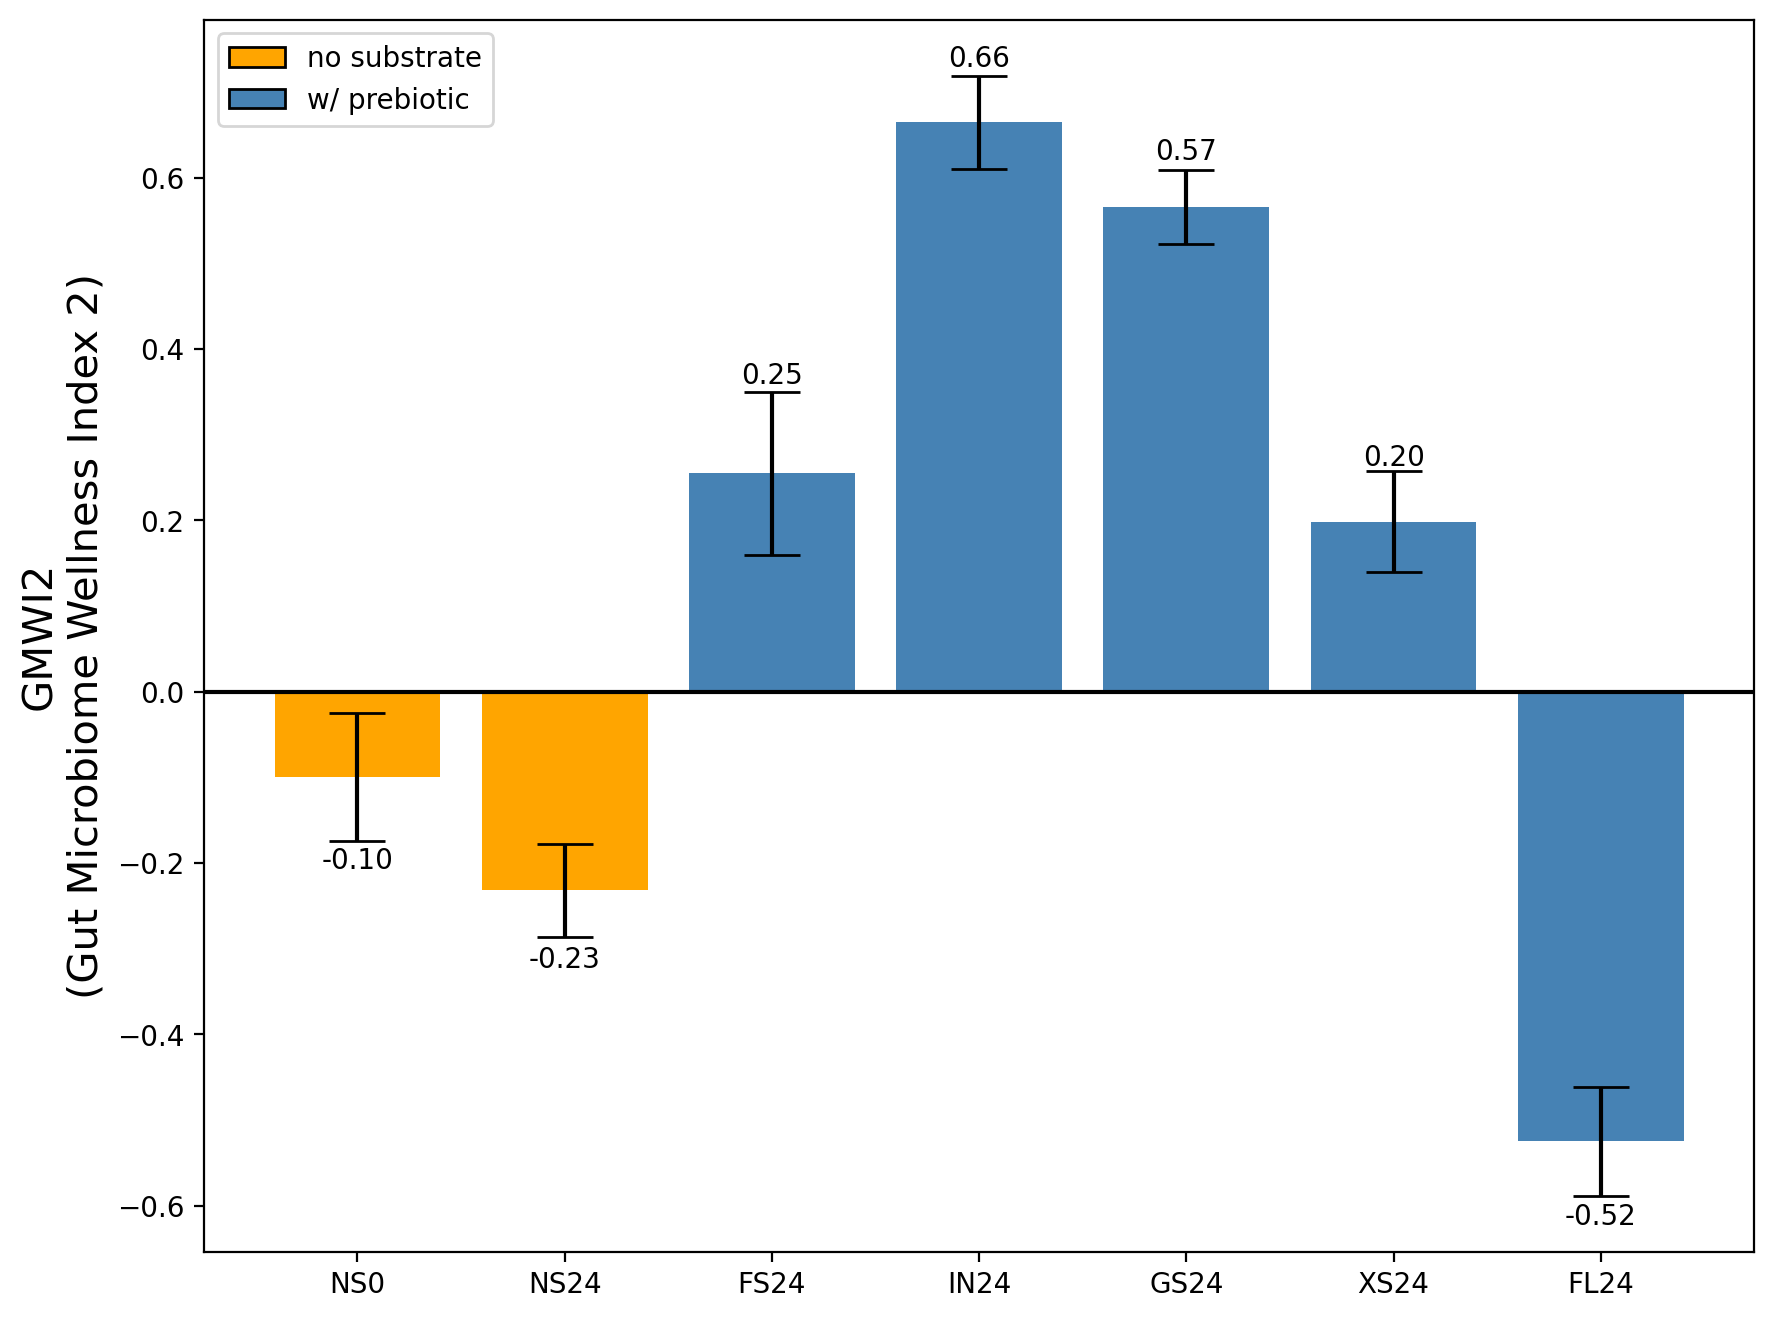

In [17]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from scipy.stats import sem

padding = [25, 20, 30, 18, 15, 18, 22]

plt.figure(figsize=(10, 8), dpi=200)

ax = plt.gca()

for i, g in enumerate(groups):
    color = "orange" if g.startswith("NS") else "steelblue"
    mean = np.mean(group_values[g])
    p = ax.bar(i, mean, color=color)
    plt.bar_label(p, label_type='edge', fmt="%.2f", padding=padding[i])
    
plt.axhline(y=0, color='black', linestyle='-')

legend_elements = [
    Patch(facecolor='orange', edgecolor='black', label='no substrate'),
    Patch(facecolor='steelblue', edgecolor='black', label='w/ prebiotic'),
                  ]

plt.legend(handles=legend_elements, loc=2)

y_vals = [np.mean(group_values[g]) for g in groups]
standard_errors = [sem(group_values[g]) for g in groups]

plt.errorbar(np.arange(len(groups)), y_vals, yerr=standard_errors, fmt="none", c="black", capsize=10)

plt.xticks(np.arange(len(groups)), groups)
plt.ylabel("GMWI2\n(Gut Microbiome Wellness Index 2)", fontsize=15)
# plt.ylim(-0.65, 0.85)

plt.savefig(os.path.join(config.FIGURE_DIR, "prebiotics.pdf"))
    
plt.show()

In [18]:
df = pd.DataFrame({"GMWI2": np.array([group_values[g] for g in groups]).flatten(), "Group" : np.array([[g, g, g] for g in groups]).flatten()})
df.to_csv("../data/raw/prebiotics_gmwi2.csv")             

In [19]:
import statsmodels
import scipy

stat = scipy.stats.tukey_hsd(*[group_values[g] for g in groups])
print(stat)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.132     0.779    -0.183     0.447
 (0 - 2)     -0.354     0.023    -0.670    -0.039
 (0 - 3)     -0.764     0.000    -1.080    -0.449
 (0 - 4)     -0.665     0.000    -0.981    -0.350
 (0 - 5)     -0.298     0.070    -0.614     0.017
 (0 - 6)      0.425     0.006     0.110     0.741
 (1 - 0)     -0.132     0.779    -0.447     0.183
 (1 - 2)     -0.486     0.002    -0.802    -0.171
 (1 - 3)     -0.896     0.000    -1.212    -0.581
 (1 - 4)     -0.797     0.000    -1.113    -0.482
 (1 - 5)     -0.430     0.005    -0.746    -0.115
 (1 - 6)      0.293     0.076    -0.022     0.609
 (2 - 0)      0.354     0.023     0.039     0.670
 (2 - 1)      0.486     0.002     0.171     0.802
 (2 - 3)     -0.410     0.008    -0.725    -0.095
 (2 - 4)     -0.311     0.055    -0.626     0.005
 (2 - 5)      0.056     0.995    -0.259     0.372
 (2 - 6)      0.780     0.000   

In [20]:
scipy.stats.ttest_ind(group_values["NS0"], group_values["XS24"])

Ttest_indResult(statistic=-3.135513089709021, pvalue=0.03499870571827718)

In [25]:
pd.DataFrame(group_values).T.to_csv(os.path.join(config.LOG_DIR, "prebiotics_GMWI2.csv"))